In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette="deep")

model_title = "Qwen 3B with fallback if unknown"

mmlu_entropy_df = pd.read_csv(
    "../../../data/out/single_token_entropy/mmlu_qwen_3b_w_fallback_if_unknown.tsv",
    sep="\t",
    header=0,
    dtype={"entropy_ans_qwen2": "str"},
)

In [2]:
mmlu_entropy_df.value_counts("entropy_ans_qwen2", dropna=False)

entropy_ans_qwen2
9    1991
1    1716
8    1680
2    1489
5    1381
3    1238
4     909
7     824
6     491
0     313
Name: count, dtype: int64

In [3]:
from reasoning_fine_tune.utils.validation import keep_only_valid_and_known_answers

mmlu_entropy_df = keep_only_valid_and_known_answers(mmlu_entropy_df, "entropy_ans_qwen2")
mmlu_entropy_df.value_counts("entropy_ans_qwen2", dropna=False)

entropy_ans_qwen2
9    1991
1    1716
8    1680
2    1489
5    1381
3    1238
4     909
7     824
6     491
Name: count, dtype: int64

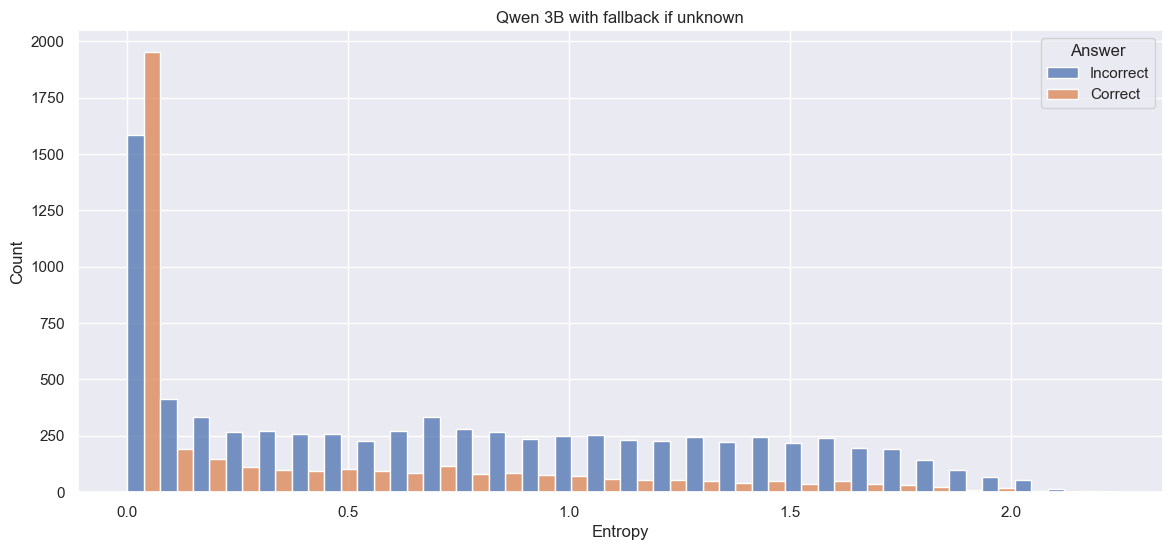

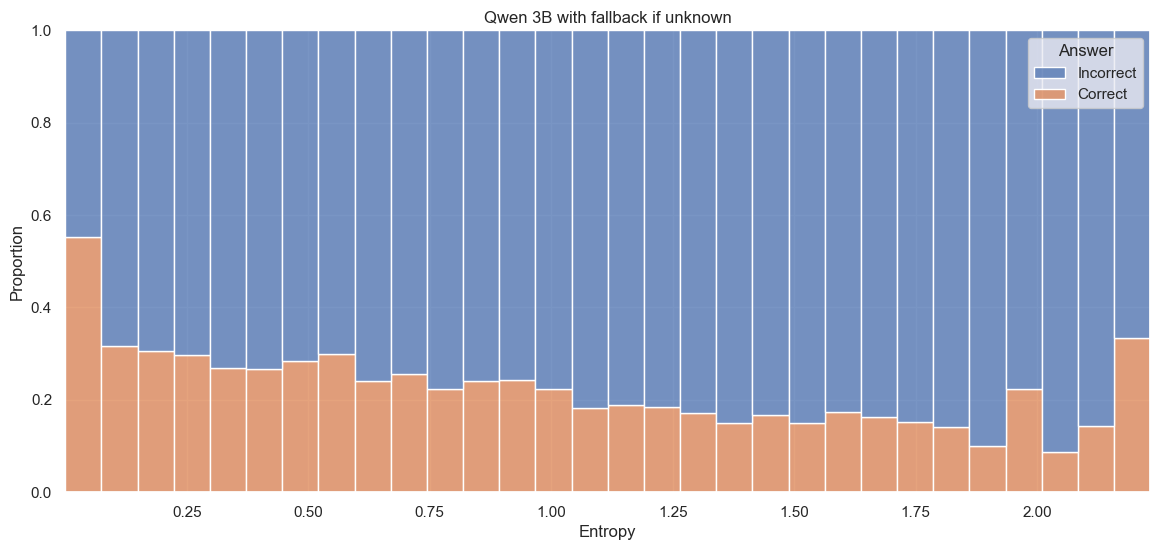

In [4]:
from reasoning_fine_tune.analysis.visualize_entropy_all import visualize_entropy_all

visualize_entropy_all(mmlu_entropy_df, "entropy_value_qwen2", "entropy_ans_correct_qwen2", model_name=model_title)

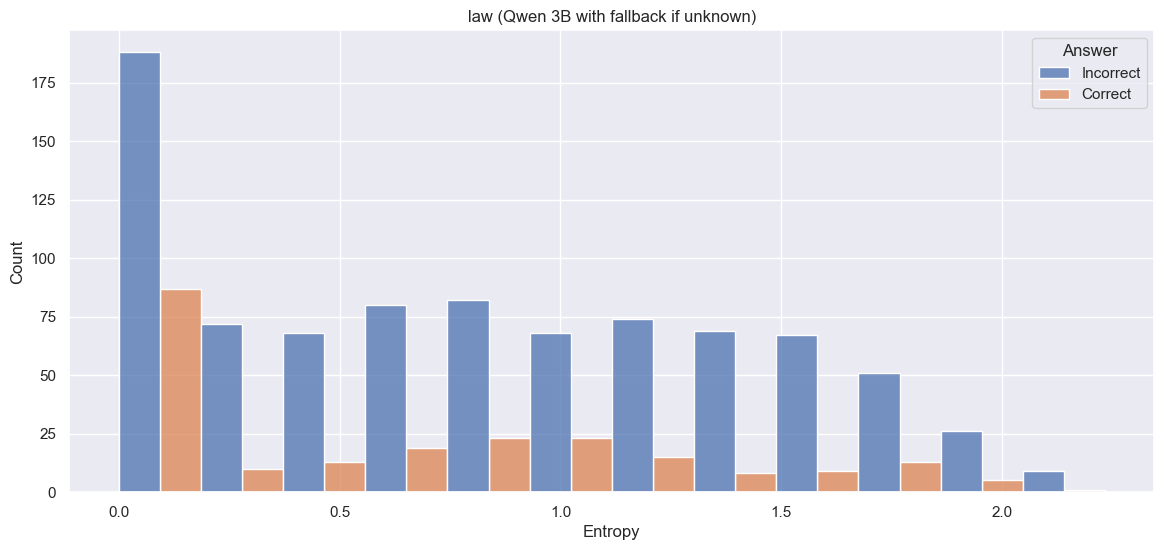

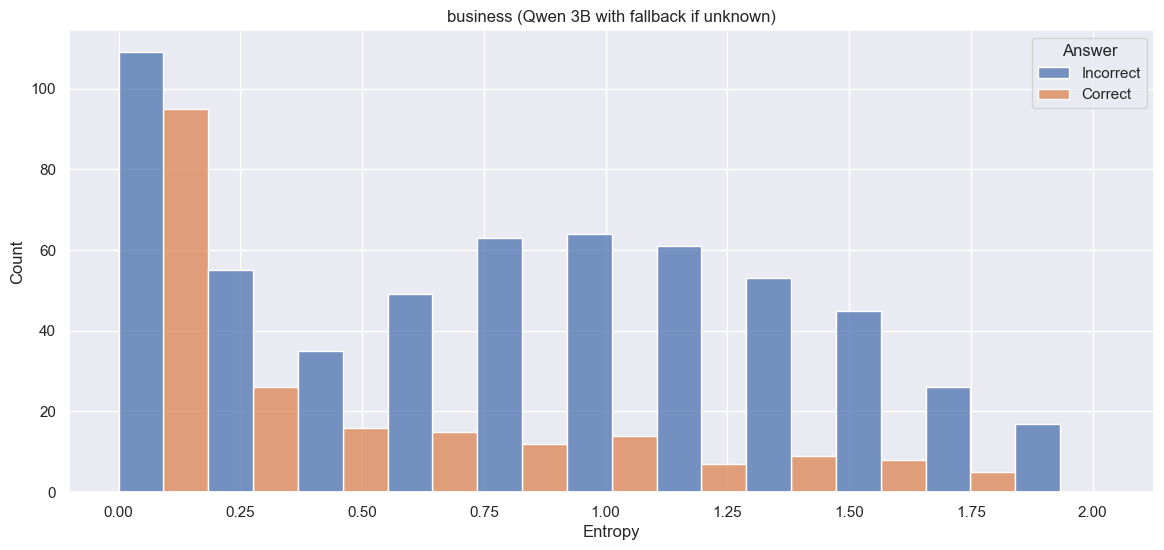

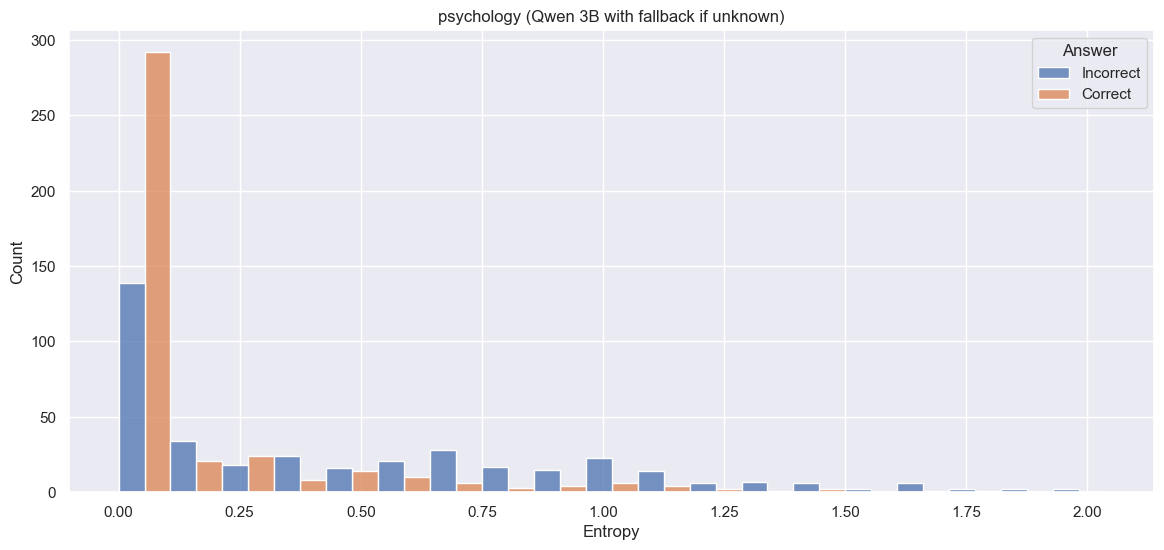

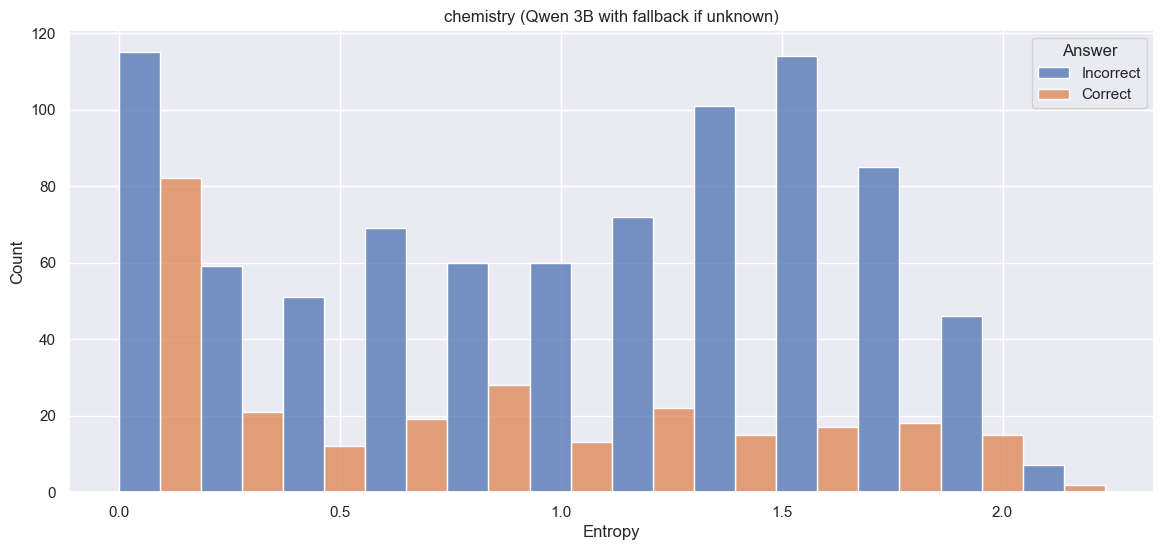

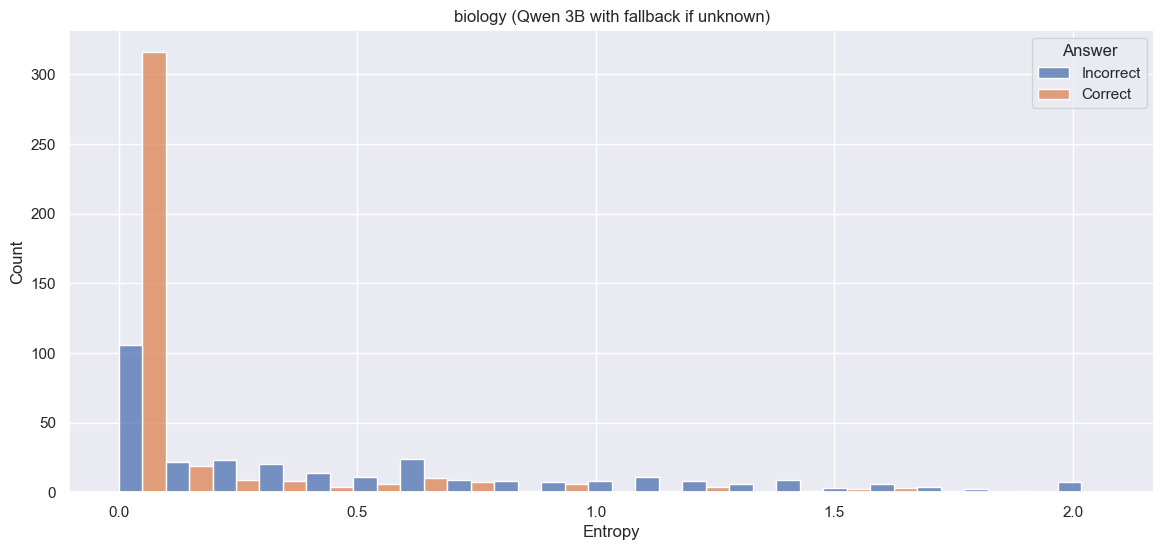

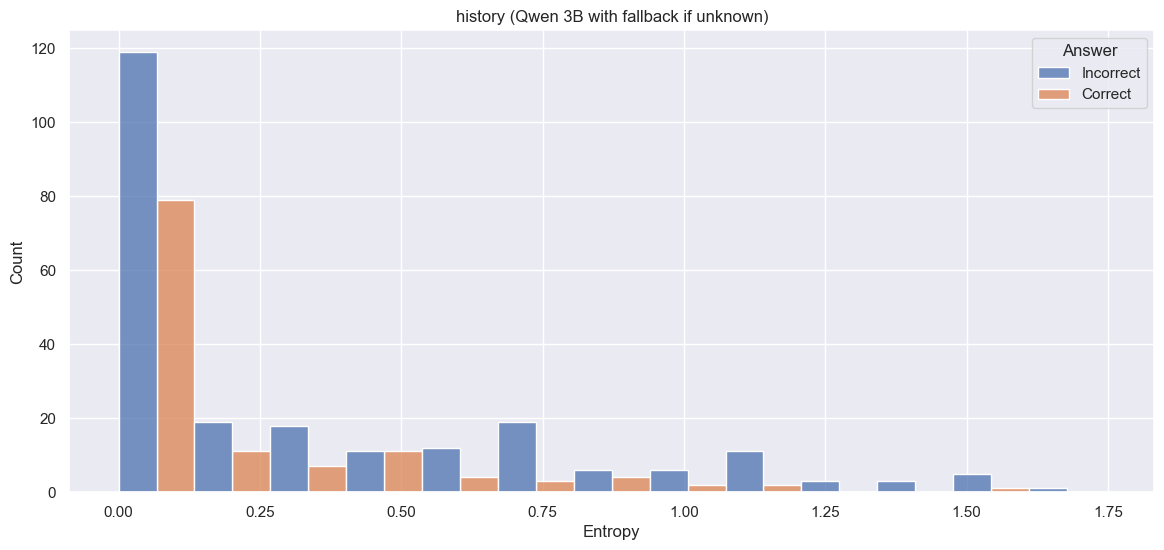

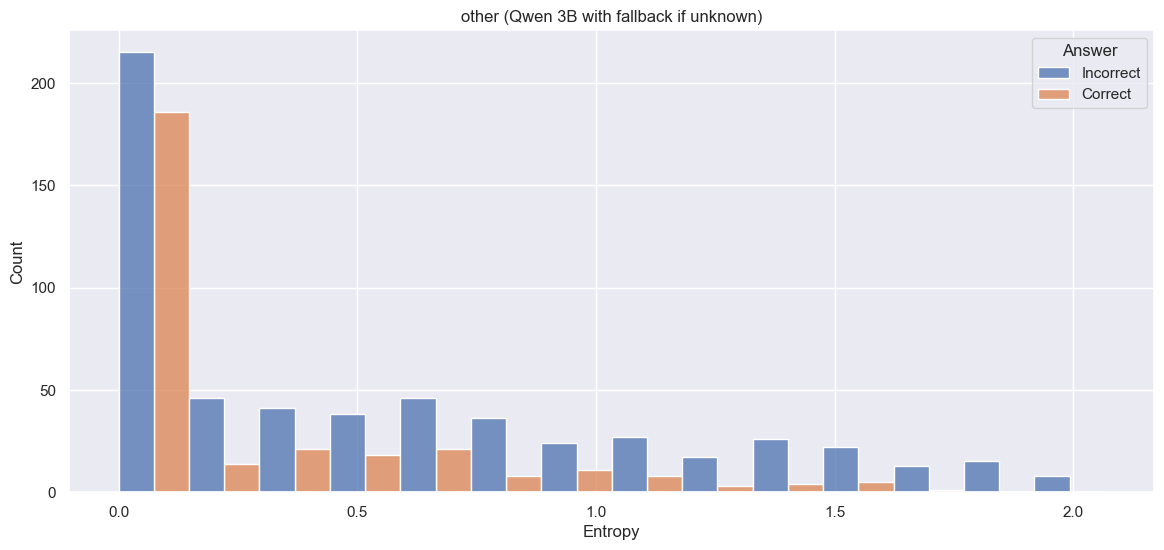

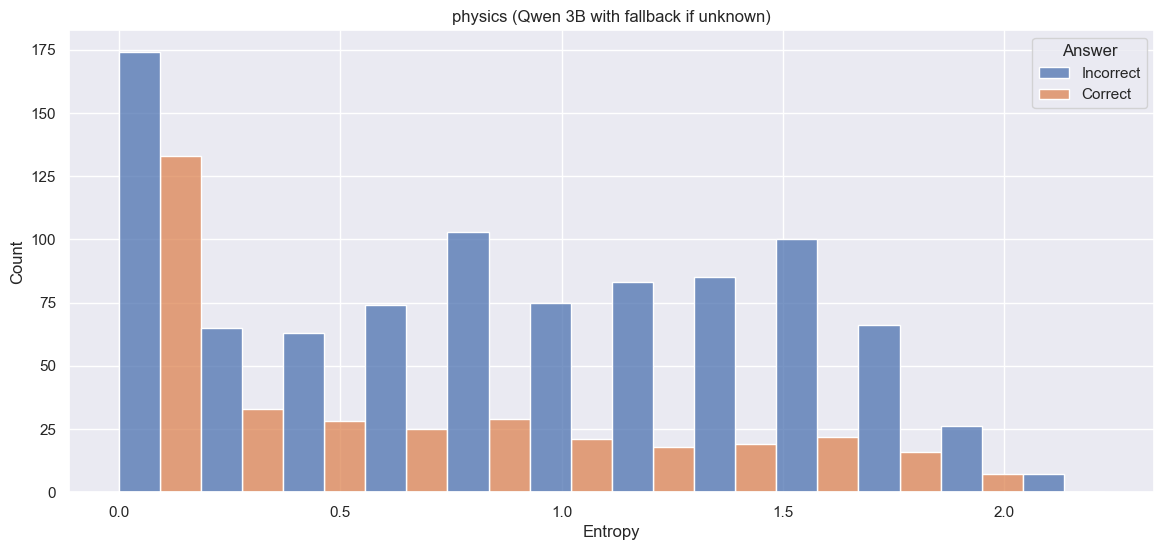

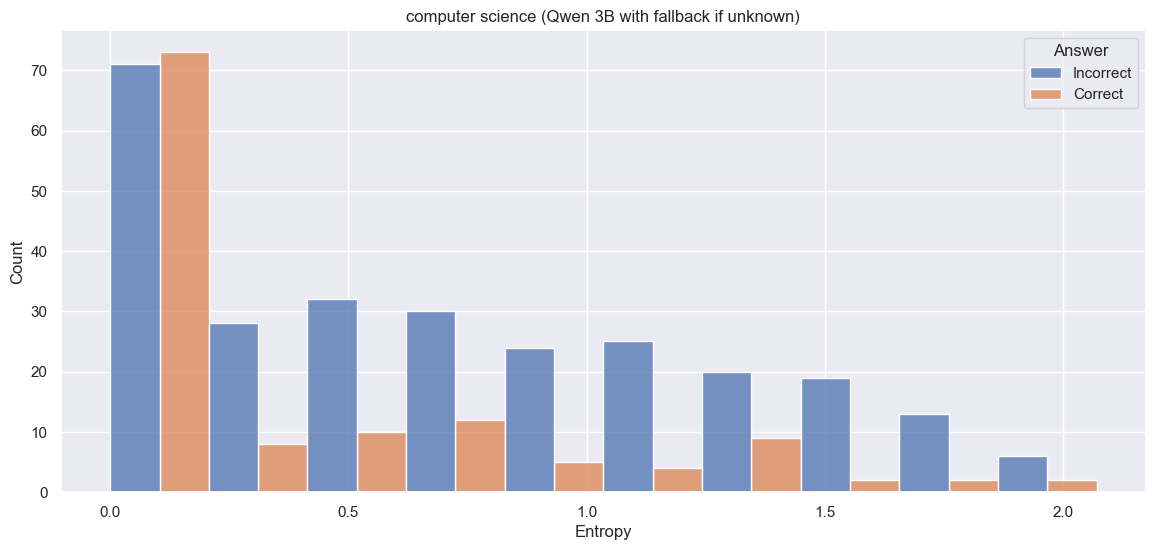

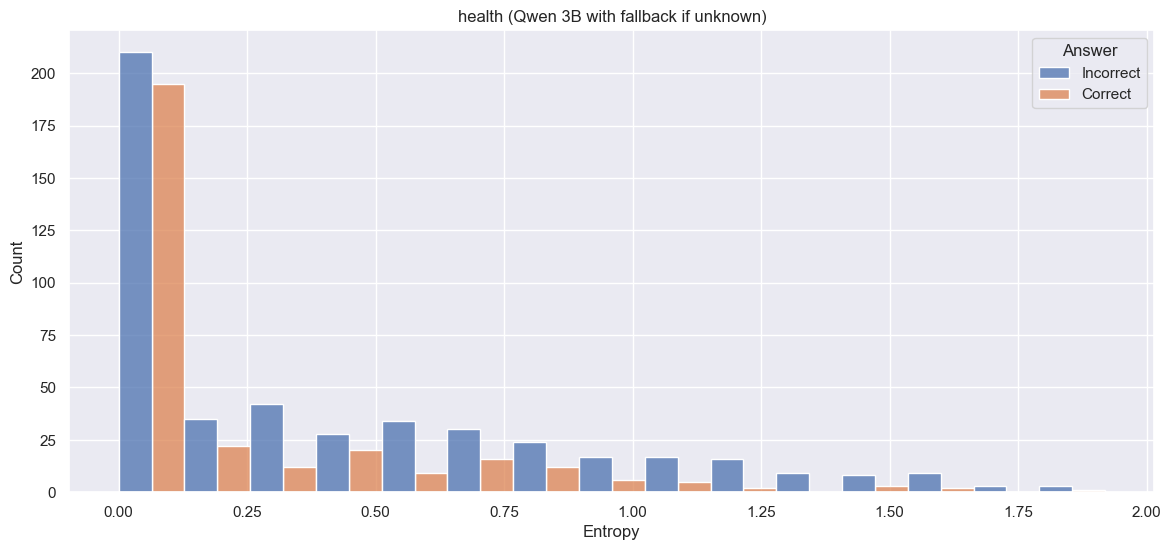

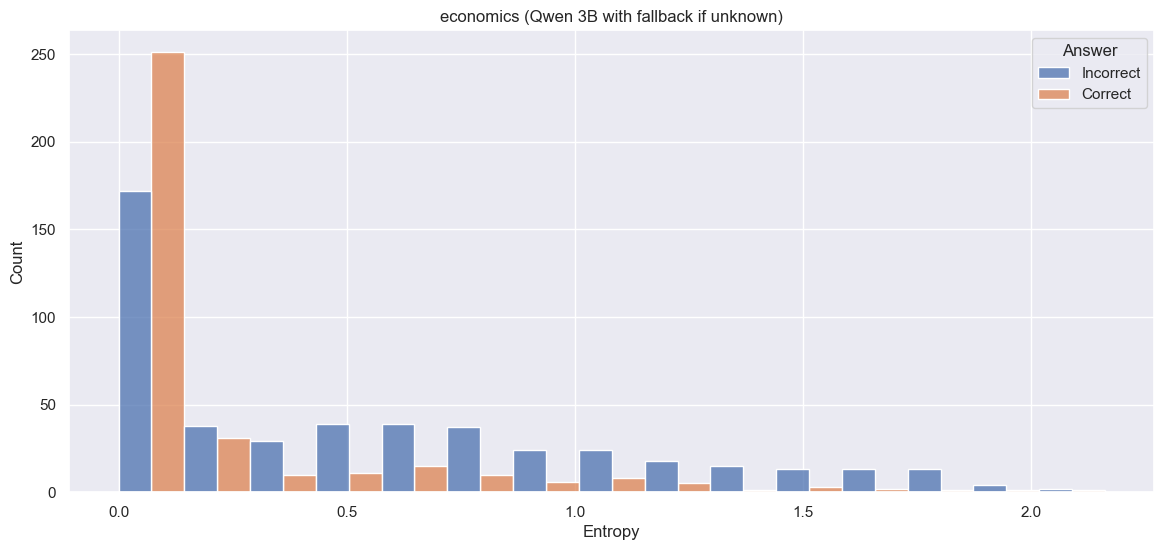

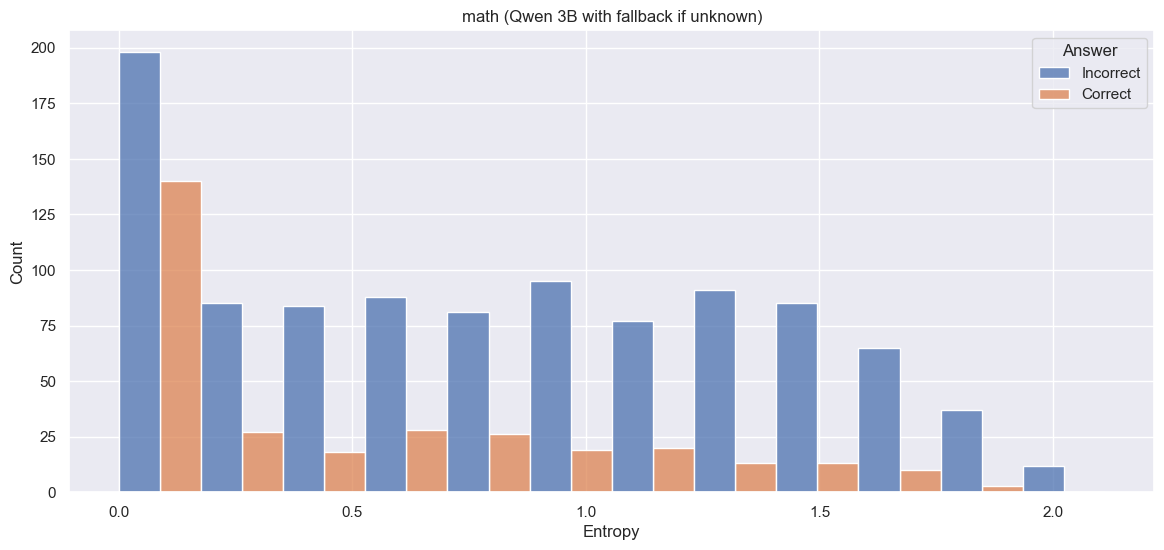

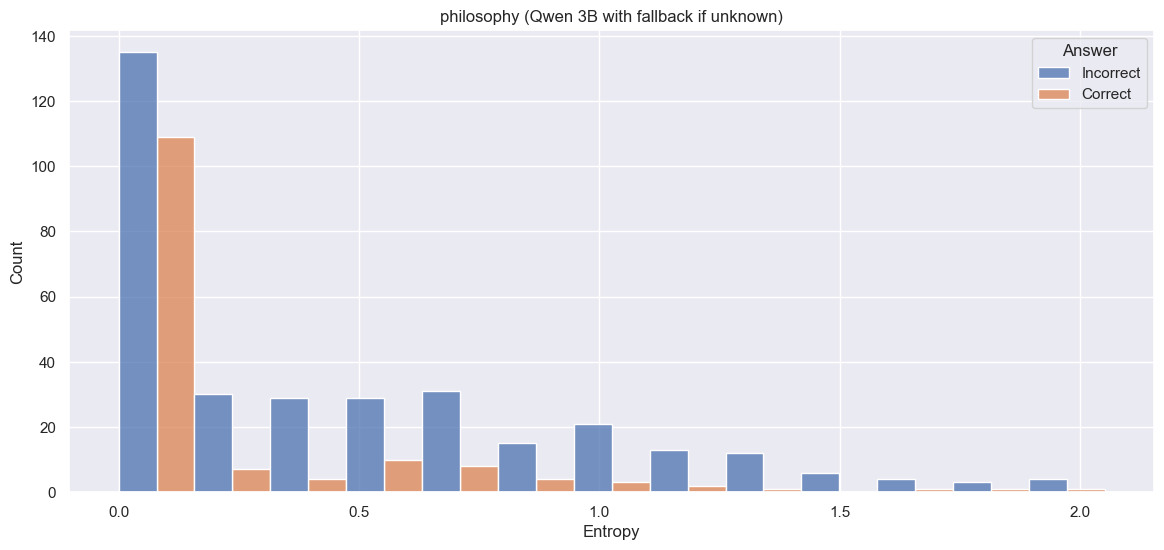

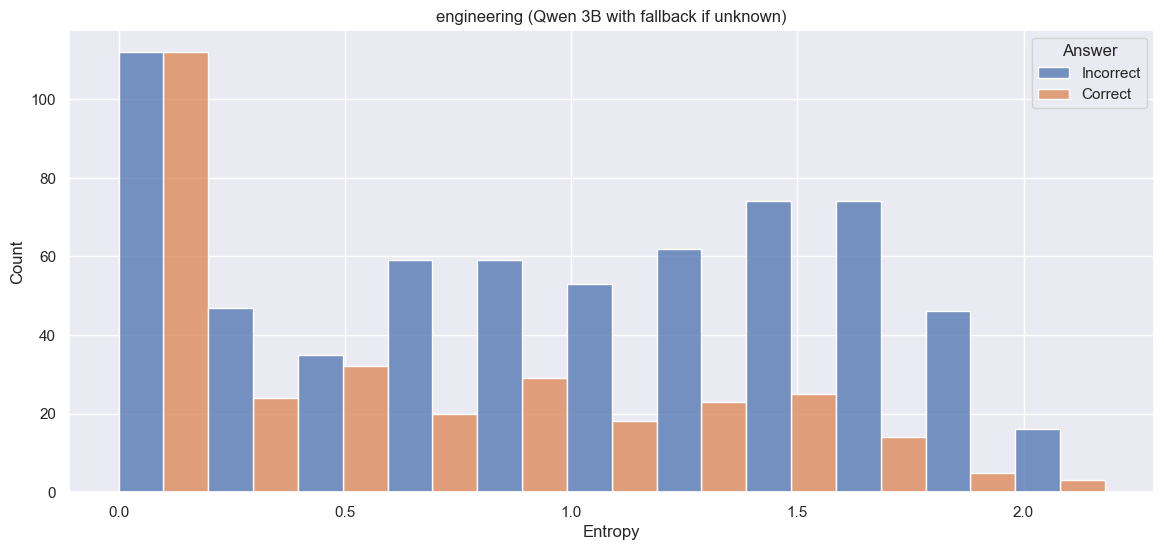

In [5]:
from reasoning_fine_tune.analysis.visualize_entropy_by_category import visualize_entropy_by_category

visualize_entropy_by_category(
    mmlu_entropy_df, "category", "entropy_value_qwen2", "entropy_ans_correct_qwen2", model_name=model_title
)

In [6]:
from reasoning_fine_tune.analysis.roc_auc import calculate_roc_auc_by_category

roc_auc_res = calculate_roc_auc_by_category(
    mmlu_entropy_df,
    category_col="category",
    model_answer_correct_col="entropy_ans_correct_qwen2",
    score_col="entropy_value_qwen2",
    model_name=model_title,
)
roc_auc_res

,category,roc_auc,gini,num_samples,accuracy,model,metric
0,ALL,0.704406,0.408812,11719,0.326820,Qwen 3B with fallback if unknown,entropy_value_qwen2
1,law,0.596029,0.192058,1080,0.209259,Qwen 3B with fallback if unknown,entropy_value_qwen2
2,business,0.705113,0.410226,784,0.264031,Qwen 3B with fallback if unknown,entropy_value_qwen2
3,psychology,0.754163,0.508326,781,0.510883,Qwen 3B with fallback if unknown,entropy_value_qwen2
4,chemistry,0.622878,0.245756,1103,0.239347,Qwen 3B with fallback if unknown,entropy_value_qwen2
5,biology,0.792563,0.585126,707,0.562942,Qwen 3B with fallback if unknown,entropy_value_qwen2
6,history,0.627059,0.254119,357,0.347339,Qwen 3B with fallback if unknown,entropy_value_qwen2
7,other,0.673240,0.346481,874,0.343249,Qwen 3B with fallback if unknown,entropy_value_qwen2
8,physics,0.639841,0.279682,1272,0.275943,Qwen 3B with fallback if unknown,entropy_value_qwen2
9,computer science,0.699407,0.398813,395,0.321519,Qwen 3B with fallback if unknown,entropy_value_qwen2


In [7]:
from reasoning_fine_tune.analysis.join_with_masj_education_levels import join_with_masj_education_levels

mmlu_entropy_df_with_masj = join_with_masj_education_levels(mmlu_entropy_df)

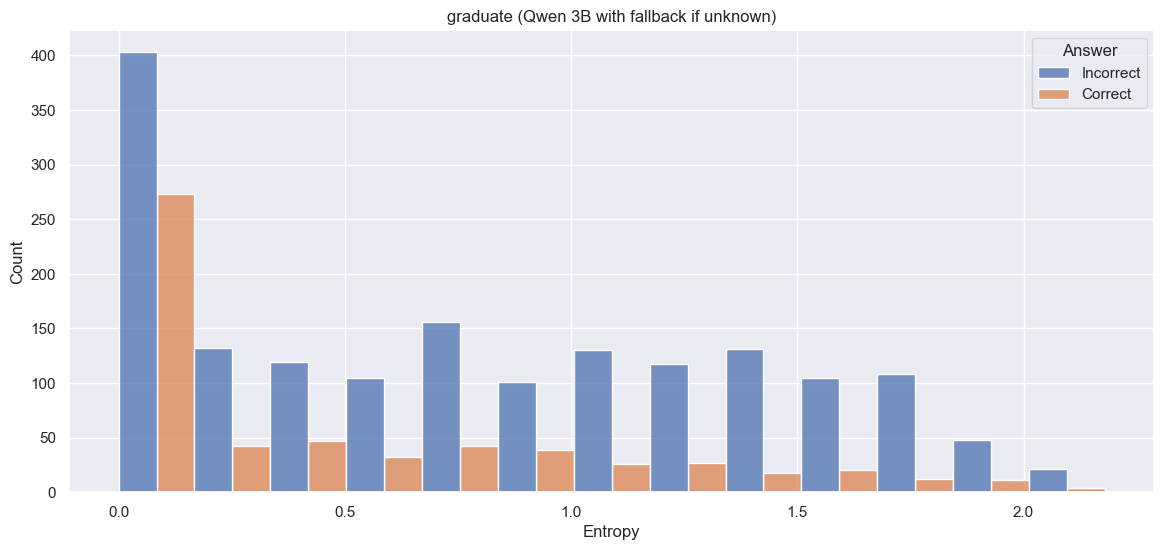

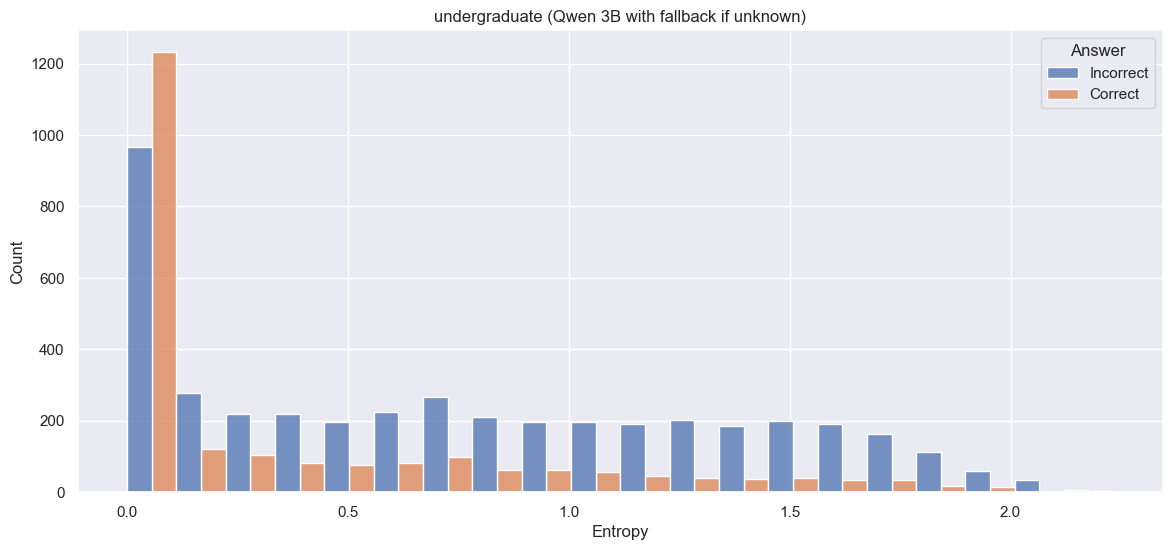

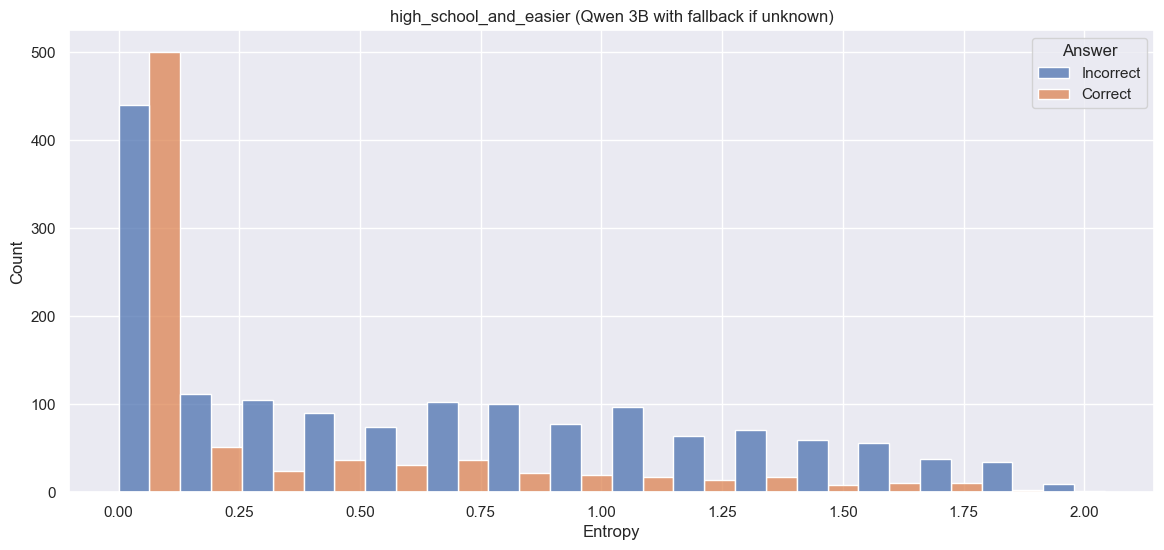

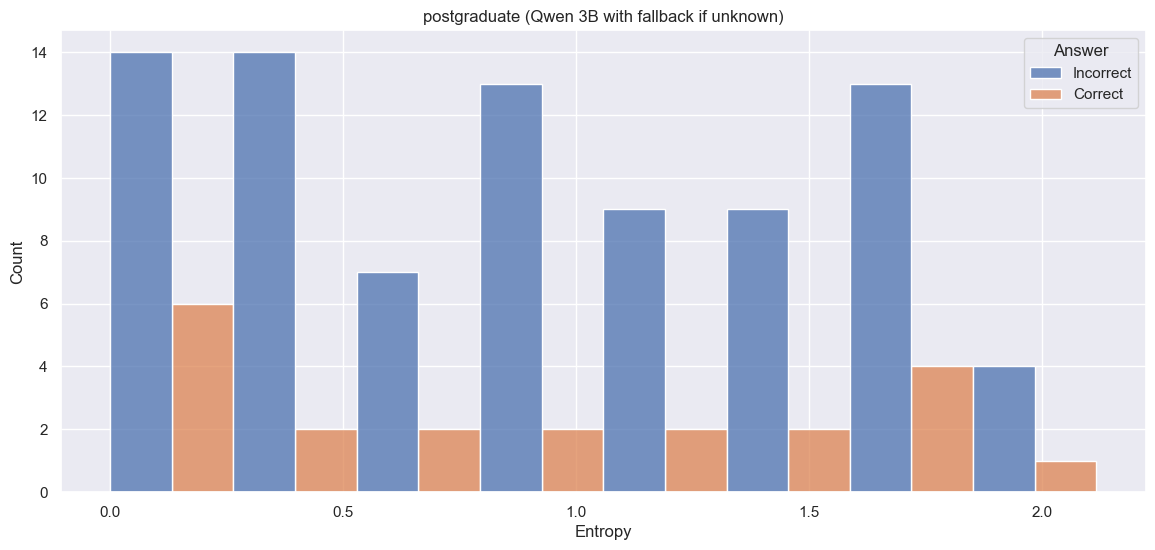

In [8]:
from reasoning_fine_tune.analysis.visualize_entropy_by_category import visualize_entropy_by_category

visualize_entropy_by_category(
    mmlu_entropy_df_with_masj,
    "masj_complexity",
    "entropy_value_qwen2",
    "entropy_ans_correct_qwen2",
    model_name=model_title,
)

In [9]:
from reasoning_fine_tune.analysis.roc_auc import calculate_roc_auc_by_category

roc_auc_res = calculate_roc_auc_by_category(
    mmlu_entropy_df_with_masj,
    category_col="masj_complexity",
    model_answer_correct_col="entropy_ans_correct_qwen2",
    score_col="entropy_value_qwen2",
    model_name=model_title,
)
roc_auc_res

,category,roc_auc,gini,num_samples,accuracy,model,metric
0,ALL,0.704786,0.409573,11267,0.324665,Qwen 3B with fallback if unknown,entropy_value_qwen2
1,graduate,0.652203,0.304407,2269,0.261349,Qwen 3B with fallback if unknown,entropy_value_qwen2
2,undergraduate,0.711990,0.423981,6565,0.341508,Qwen 3B with fallback if unknown,entropy_value_qwen2
3,high_school_and_easier,0.724814,0.449627,2329,0.344354,Qwen 3B with fallback if unknown,entropy_value_qwen2
4,postgraduate,0.517499,0.034997,104,0.201923,Qwen 3B with fallback if unknown,entropy_value_qwen2
